In [161]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [3]:
%matplotlib inline

# Read Data

In [4]:
df=pd.read_csv('D:/data science/Refactored_Py_DS_ML_Bootcamp-master/10-Data-Capstone-Projects/911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
df.shape

(99492, 9)

# What are the top 5 zipcodes for 911 calls?

In [13]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

# What are the top 5 townships (twp) for 911 calls?

In [18]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

# No of unique titles

In [19]:
df['title'].nunique()

110

In [22]:
df['title'].loc[0]

'EMS: BACK PAINS/INJURY'

In [25]:
x=df['title'].loc[0].split(':')
print(x[0])

EMS


New colomn Reason 

In [36]:


df['Reason']=df['title'].apply(lambda title:title.split(':')[0])


In [40]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

# Most common reasons for call

In [42]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

# Countplot for call by reason

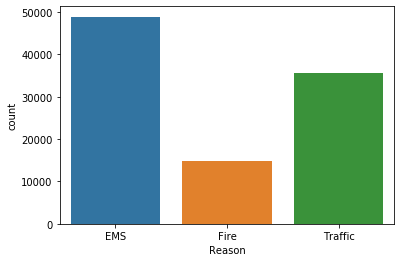

In [52]:
sns.countplot(x='Reason',data=df)

Data type of timestamp

In [64]:
type(df['timeStamp'].iloc[0])

str

Changing data type of timeStamp colomn

In [66]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [67]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

# Adding Colomns for Day,Month and Hour

In [79]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [108]:
df.drop(columns='Month',inplace=True)

In [109]:
df['Month']=df['timeStamp'].apply(lambda time:time.month)

In [88]:
df['Day of week']=df['timeStamp'].dt.day_name()

In [110]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thursday,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thursday,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thursday,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thursday,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thursday,12


# Countplot of the Day of Week column with the hue based off of the Reason column

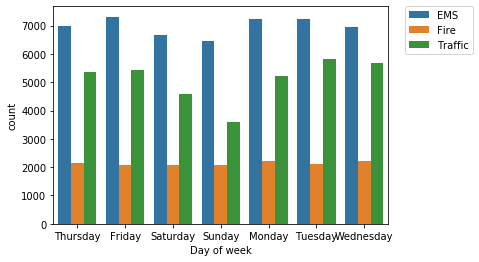

In [103]:
sns.countplot(x='Day of week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

# Countplot of the Month with the hue based off of the Reason 

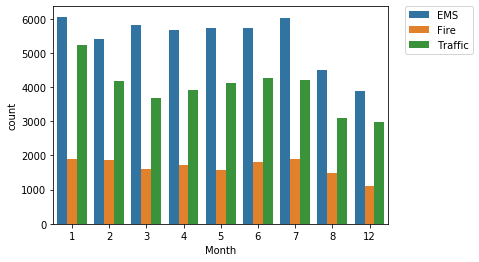

In [111]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

In [113]:
month_group=df.groupby(['Month'])

In [125]:
month_group.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [123]:
by_month=month_group.count()

# A plot indicating the count of calls per month

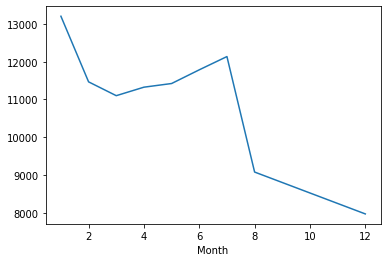

In [124]:
by_month['lat'].plot()

# A linear fit on the number of calls per month.

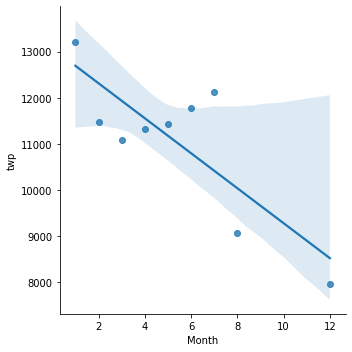

In [128]:
sns.lmplot(x='Month',y='twp',data=by_month.reset_index())

In [140]:
df['timeStamp'].iloc[0].date()

datetime.date(2015, 12, 10)

In [141]:
df['Date']=df['timeStamp'].apply(lambda datetime:datetime.date())

In [143]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thursday,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thursday,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thursday,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thursday,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thursday,12,2015-12-10


In [223]:
#df.groupby('Date').count()['lat'].plot()
#plt.tight_layout()

# A plot of counts of 911 calls by date

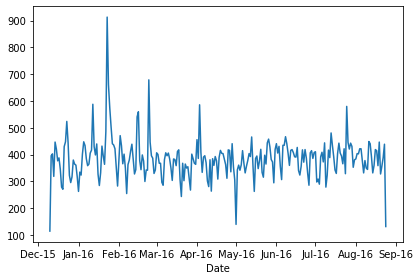

In [165]:
ax=date_group.count()['lat'].plot()
plt.tight_layout()
date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)



# Plot representing reason EMS for the 911 call

Text(23.875, 0.5, 'Count')

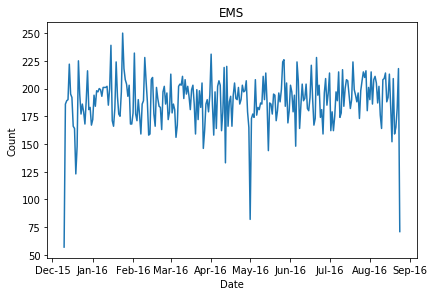

In [194]:
ay=df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
date_form = DateFormatter("%b-%y")
ay.xaxis.set_major_formatter(date_form)
plt.title('EMS')
plt.ylabel('Count')

# A plot representing reason Traffic for the 911 call

Text(24.125, 0.5, 'Count')

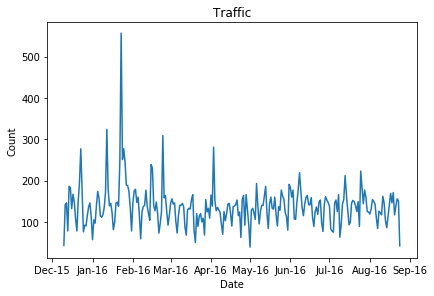

In [193]:
ay=df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
date_form = DateFormatter("%b-%y")
ay.xaxis.set_major_formatter(date_form)
plt.title('Traffic')
plt.ylabel('Count')

# A plot representing reason Fire for the 911 call

Text(24.0, 0.5, 'Count')

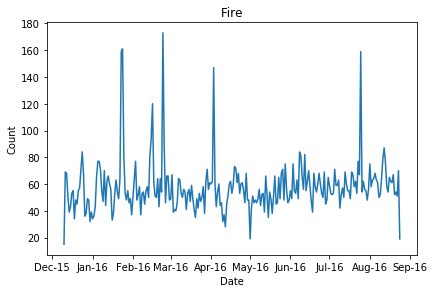

In [195]:
ay=df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
date_form = DateFormatter("%b-%y")
ay.xaxis.set_major_formatter(date_form)
plt.title('Fire')
plt.ylabel('Count')

# HeatMap of Hour by Day of week for call count

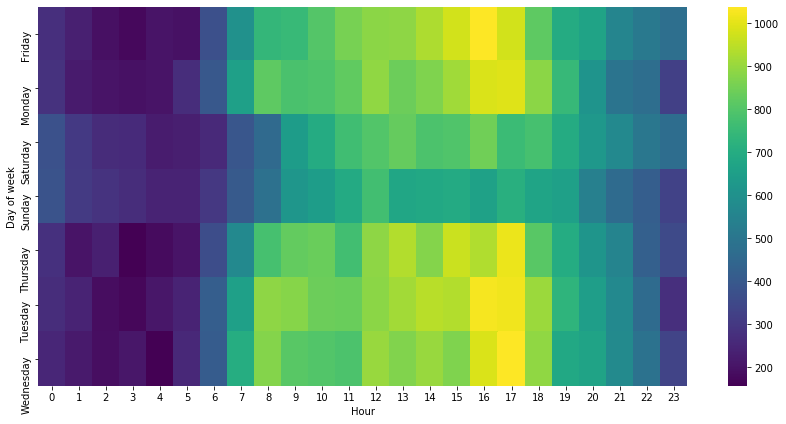

In [209]:
plt.figure(figsize=(12,6))
dayhour=df.groupby(by=['Day of week','Hour']).count()['Reason'].unstack()
ad=sns.heatmap(dayhour,cmap='viridis')
plt.tight_layout()

# Cluster Map of Hour by Day of week for call count

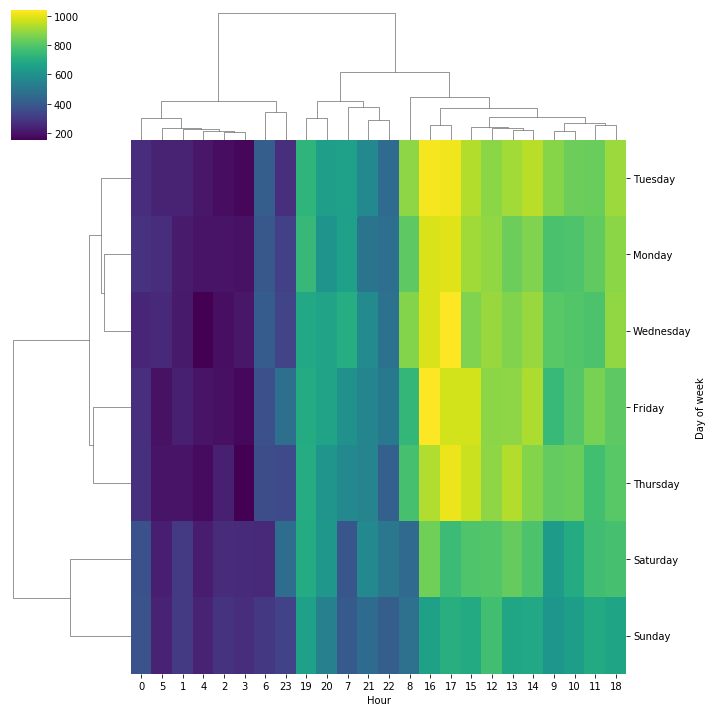

In [210]:
sns.clustermap(dayhour,cmap='viridis')

# HeatMap of Month by Day of week for call count

In [214]:
bymonth=df.groupby(by=['Day of week','Month']).count()['Reason'].unstack()

<Figure size 864x432 with 0 Axes>

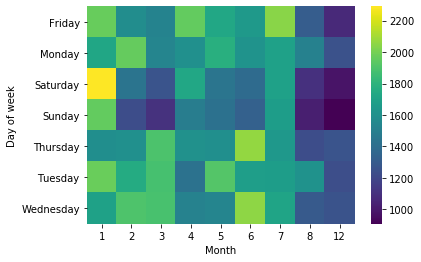

<Figure size 864x432 with 0 Axes>

In [221]:
af=sns.heatmap(bymonth,cmap='viridis')
plt.figure(figsize=(12,6))

# ClusterMap of Hour by Day of week for call count

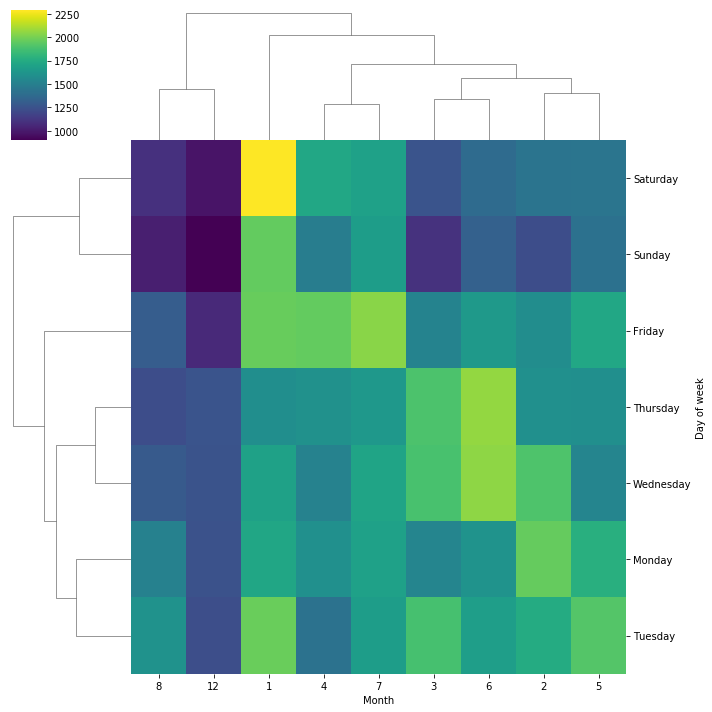

In [222]:
af=sns.clustermap(bymonth,cmap='viridis')